<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

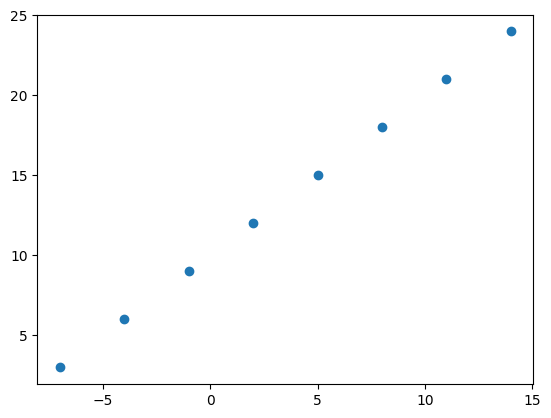

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [4]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [7]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 444ms/step - loss: 10.5224 - mae: 10.5224
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 10.3899 - mae: 10.3899
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 10.2574 - mae: 10.2574
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.1249 - mae: 10.1249
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.9924 - mae: 9.9924


In [8]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[17.487825]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [10]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 19.6294 - mae: 19.6294
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 19.3481 - mae: 19.3481
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 19.0669 - mae: 19.0669
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 18.7856 - mae: 18.7856
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 18.5044 - mae: 18.5044
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 18.2231 - mae: 18.2231
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9419 - mae: 17.9419
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 17.6606 - mae: 17.6606
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.3794 - mae: 17.3794
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 17.0981 - mae: 17.0981
Epoch 11/100
1/1 [==============================] - 0s 

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[29.193884]], dtype=float32)

In [13]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 768ms/step - loss: 13.3572 - mae: 13.3572
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8924 - mae: 12.8924
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.4255 - mae: 12.4255
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9416 - mae: 11.9416
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4138 - mae: 11.4138
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8141 - mae: 10.8141
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1067 - mae: 10.1067
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2414 - mae: 9.2414
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1310 - mae: 8.1310
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.6533 - mae: 6.6533
Epoch 11/100
1/1 [==============================] - 0s 9ms/

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 155ms/step


array([[29.933788]], dtype=float32)

In [15]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 848ms/step - loss: 13.8624 - mae: 13.8624
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8298 - mae: 13.8298
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7977 - mae: 13.7977
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7659 - mae: 13.7659
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.7341 - mae: 13.7341
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13.7031 - mae: 13.7031
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6731 - mae: 13.6731
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6435 - mae: 13.6435
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 13.6140 - mae: 13.6140
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5845 - mae: 13.5845
Epoch 11/100
1/1 [==============================] - 

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 79ms/step


array([[7.2024426]], dtype=float32)

In [53]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 27.3750 - mae: 27.3750
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4612 - mae: 12.4612
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2235 - mae: 10.2235
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5619 - mae: 12.5619
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0615 - mae: 10.0615
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2891 - mae: 9.2891
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2202 - mae: 9.2202
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4993 - mae: 10.4993
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3409 - mae: 9.3409
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1980 - mae: 8.1980
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

In [54]:
model.predict([17.0])

1/1 [==============================] - 0s 151ms/step


array([[26.982191]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

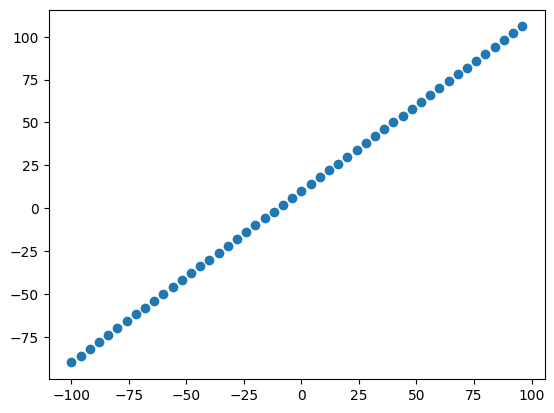

In [21]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [22]:
X_train = X[:40]
X_test = X[40:]

In [23]:
y_train = y[:40]
y_test = y[40:]

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

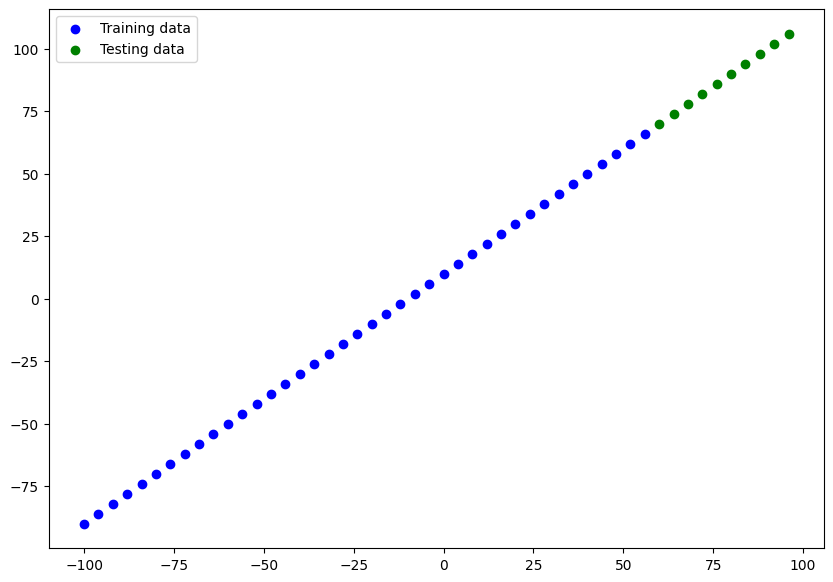

In [25]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [28]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [51]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [52]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 50)                100       
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


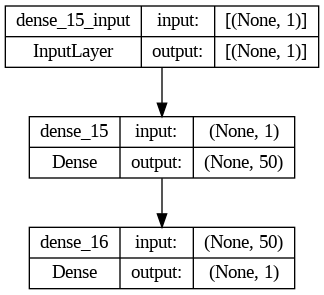

In [63]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [61]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 50ms/step


array([[ 70.01469],
       [ 74.01772],
       [ 78.02073],
       [ 82.02376],
       [ 86.02677],
       [ 90.02981],
       [ 94.03282],
       [ 98.03586],
       [102.03888],
       [106.0419 ]], dtype=float32)

In [62]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [64]:
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[26.982191]], dtype=float32)

In [56]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

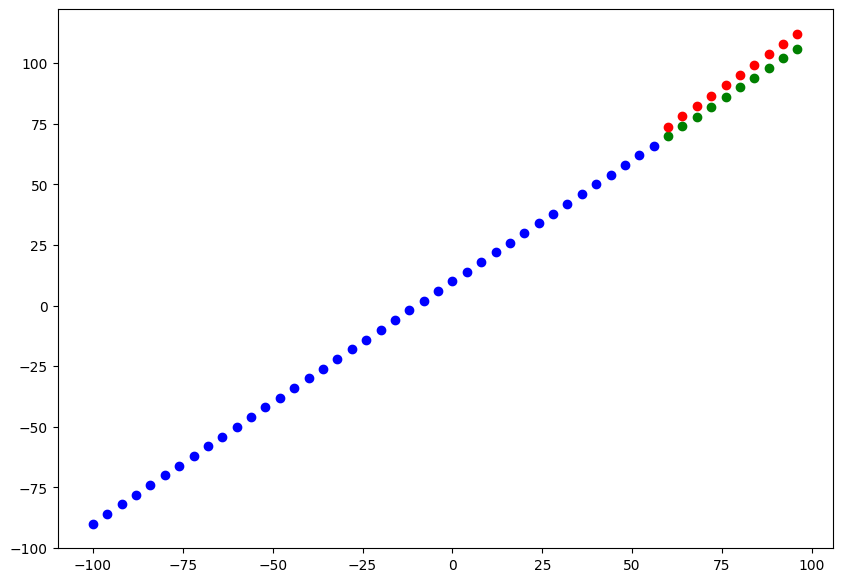

In [65]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [58]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 109ms/step - loss: 0.0283 - mae: 0.0283


[0.02829284593462944, 0.02829284593462944]

In [67]:
# Ca;culate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.98825  , 14.789366 , 12.391708 , 10.795248 , 10.       ,
       10.005961 , 10.813128 , 12.4215145, 14.831103 , 18.0419   ],
      dtype=float32)>

In [66]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.01469],
       [ 74.01772],
       [ 78.02073],
       [ 82.02376],
       [ 86.02677],
       [ 90.02981],
       [ 94.03282],
       [ 98.03586],
       [102.03888],
       [106.0419 ]], dtype=float32)>

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [69]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.01469,  74.01772,  78.02073,  82.02376,  86.02677,  90.02981,
        94.03282,  98.03586, 102.03888, 106.0419 ], dtype=float32)>

In [71]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.02829361>

In [72]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.00087595114>

In [73]:
def MAE(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def MSE(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)